In [1]:
import pandas as pd
import numpy as np
from Bio import SeqIO
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from Bio import Phylo
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

In [2]:
#Calculate the pooled variance, given sample sizes and standard deviations of each group
def get_pooled_var(participant_samplesn_list,participant_sd_list):
    pooled_variance_numerator = 0
    pooled_variance_denominator = 0
    counter = 0
    for n in participant_samplesn_list:
        pooled_variance_numerator = pooled_variance_numerator + (n - 1)*participant_sd_list[counter]**2
        pooled_variance_denominator = pooled_variance_denominator + n
        counter = counter + 1

    pooled_variance_denominator = pooled_variance_denominator - len(participant_samplesn_list)

    pooled_variance = pooled_variance_numerator/pooled_variance_denominator
    return(pooled_variance)

#Calculate the pooled variance, given sample sizes and standard deviations of each group
def get_std(participant_average_list,participant_samplesn_list,participant_sd_list):
    pooled_variance_numerator = 0
    pooled_variance_denominator = 0
    counter = 0
    for n in participant_samplesn_list:
        pooled_variance_numerator = pooled_variance_numerator + (n - 1)*participant_sd_list[counter]**2
        pooled_variance_denominator = pooled_variance_denominator + n
        counter = counter + 1

    pooled_variance_denominator = pooled_variance_denominator - len(participant_samplesn_list)

    #If samples sizes of all participants are 1, just calculate standard deviation
    if pooled_variance_denominator == 0:
        return(np.std(participant_average_list))
    
    #If pooled variance method is appropriate, calculate pooled variance and take square root to report
    #standard deviation
    else:
        pooled_variance = pooled_variance_numerator/pooled_variance_denominator
        return(np.sqrt(pooled_variance))
    
def order_samples_prox2dist(df):
    runs_prox2dist = []
    for subloc in gi_prox2dist: 
        runs_in_subloc = meta[meta['tissue_type'] == subloc].Run.tolist()
        for run in runs_in_subloc:
            if run in df.index:
                runs_prox2dist.append(run)
    
    df_prox2dist = df.reindex(index = runs_prox2dist)
    
    #Make a list of corresponding tissue types in order 
    tissue_type_prox2dist = []
    for run in df_prox2dist.index:
        tissue_type_prox2dist.append(meta[meta['Run'] == run]['tissue_type'].tolist()[0])

    return([df_prox2dist,tissue_type_prox2dist])

In [3]:
#make sure this is bacterial only
representative_hgm_mags = pd.read_csv('~/20210519_signalp_analysis/ipynb_out/representative_hgm_mags.csv')

#Import metadata for HGM MAGs
HGM_species = pd.read_csv('/home/ec2-user/20190504_HGM_prodigal/IGG_species_info_23790.tsv', sep='\t')
HGM_genomes = pd.read_csv('/home/ec2-user/20190504_HGM_prodigal/IGG_genome_info_206581.tsv', sep='\t')

bac_species = HGM_species[HGM_species['gtdb_taxonomy'].str.contains('d__Bacteria')]['species_id'].tolist()
bac_mags = HGM_genomes[HGM_genomes['species_id'].isin(bac_species)]['genome_id'].unique().tolist()

#Add phylum and family for each OTU
phylist = []
famlist = []

for tax in HGM_species['gtdb_taxonomy']:
    if len(tax.split(';')) > 1:
        phylist.append(tax.split(';')[1].replace('p__',''))
    else:
         phylist.append('NA')
    
    if len(tax.split(';')) > 4:
            famlist.append(tax.split(';')[4].replace('f__',''))
    else:
        famlist.append('NA')
            
HGM_species['Phylum'] = phylist
HGM_species['Family'] = famlist

phycoldict = {'Firmicutes': 'red', 
 'Actinobacteria': 'green', 
 'Bacteroidetes': 'blue', 
 'Proteobacteria': 'orange',
       'Verrucomicrobia': 'lightgreen', 
 'Desulfobacteraeota_A': 'lightblue', 
 'Cyanobacteria': 'gray',
       'Fusobacteria': 'purple', 
 'Spirochaetes': 'yellow', 
 'Elusimicrobia': 'pink',
'Epsilonbacteraeota': 'brown'}

gi_prox2dist_coor = {'Gastric fundus mucosa': 1.0,
 'Stomach lumen': 2.0,
 'Gastric antrum mucosa': 3.0,
 'Duodenal bulb mucosa':5.5,
 'Duodenum lumen':6.5,
 'Jejunum lumen':9.0,
 'Jejunum mucosa':10.0,
 'Terminal ileum lumen':12.5,
 'Terminal ileum mucosa':13.5,
 'Cecum lumen':16.0,
 'Cecum mucosa':17.0,
 'Ascending colon mucosa':19.5,
 'Transverse colon mucosa':22.0,
 'Descending colon lumen':24.5,
 'Descending colon mucosa':25.5,
 'Sigmoid colon mucosa':28.0,
 'Rectum mucosa':30.5,
 'Stool':33.0}

#Plot coverage as a heatmap 
#gi samples organized by proximal to distal 
#mags ... try to label by phylum
stomach_prox2dist = ['Gastric fundus mucosa',
                     'Stomach lumen',
                     'Gastric antrum mucosa']
small_int_prox2dist = ['Duodenal bulb mucosa',
                       'Duodenum lumen',
                        'Jejunum lumen',
                       'Jejunum mucosa',
                        'Terminal ileum lumen',
                       'Terminal ileum mucosa']
large_int_prox2dist = [ 'Cecum lumen',
                     'Cecum mucosa',
                       'Ascending colon mucosa',
                       'Transverse colon mucosa',
                       'Descending colon lumen',
                       'Descending colon mucosa',
                       'Sigmoid colon mucosa',
                       'Rectum mucosa']

gi_prox2dist = ['Gastric fundus mucosa',
                     'Stomach lumen',
                     'Gastric antrum mucosa',
                     'Duodenal bulb mucosa',
                       'Duodenum lumen',
                        'Jejunum lumen',
                       'Jejunum mucosa',
                        'Terminal ileum lumen',
                       'Terminal ileum mucosa',
                      'Cecum lumen',
                     'Cecum mucosa',
                       'Ascending colon mucosa',
                       'Transverse colon mucosa',
                       'Descending colon lumen',
                       'Descending colon mucosa',
                       'Sigmoid colon mucosa',
                       'Rectum mucosa',
                       'Stool']

mucosal_gi_sites = ['Gastric fundus mucosa',
                     
                     'Gastric antrum mucosa',
                     'Duodenal bulb mucosa',
                       
                     
                       'Jejunum mucosa',
                      
                       'Terminal ileum mucosa',
                      
                     'Cecum mucosa',
                       'Ascending colon mucosa',
                       'Transverse colon mucosa',
                    
                       'Descending colon mucosa',
                       'Sigmoid colon mucosa',
                       'Rectum mucosa',
                       'Stool']
lumen_gi_sites = ['Stomach lumen',
                     
                       'Duodenum lumen',
                        'Jejunum lumen',
                       
                        'Terminal ileum lumen',
                      
                      'Cecum lumen',
                  
                       'Descending colon lumen',
                     
                       'Stool']

col_dict = {'Ascending colon mucosa':'orange', 
 'Cecum lumen': 'cornflowerblue',
'Cecum mucosa': 'blue',
 'Descending colon lumen':'tomato',
'Descending colon mucosa':'red',
'Duodenal bulb mucosa':'teal',
'Duodenum lumen':'turquoise',
'Gastric antrum mucosa':'gray',
'Gastric fundus mucosa':'silver',
'Jejunum lumen':'violet',
'Jejunum mucosa':'magenta',
'Rectum mucosa': 'peru',
'Sigmoid colon mucosa':'chocolate', 
'Stomach lumen': 'gold',
'Terminal ileum lumen': 'limegreen',
'Terminal ileum mucosa': 'forestgreen',
'Transverse colon mucosa': 'sienna',
'Stool': 'black'}

gi_prox2dist_coor = {'Gastric fundus mucosa': 1.0,
 'Stomach lumen': 2.0,
 'Gastric antrum mucosa': 3.0,
 'Duodenal bulb mucosa':5.5,
 'Duodenum lumen':6.5,
 'Jejunum lumen':9.0,
 'Jejunum mucosa':10.0,
 'Terminal ileum lumen':12.5,
 'Terminal ileum mucosa':13.5,
 'Cecum lumen':16.0,
 'Cecum mucosa':17.0,
 'Ascending colon mucosa':19.5,
 'Transverse colon mucosa':22.0,
 'Descending colon lumen':24.5,
 'Descending colon mucosa':25.5,
 'Sigmoid colon mucosa':28.0,
 'Rectum mucosa':30.5,
 'Stool':33.0}

gi_prox2dist_coor_overlay = {'Gastric fundus mucosa': 0.5,
 'Stomach lumen': 2.0,
 'Gastric antrum mucosa': 3.0,
 'Duodenal bulb mucosa':5.5,
 'Duodenum lumen':6.5,
 'Jejunum lumen':9.0,
 'Jejunum mucosa':9.0,
 'Terminal ileum lumen':11.5,
 'Terminal ileum mucosa':11.5,
 'Cecum lumen':14.0,
 'Cecum mucosa':14.0,
 'Ascending colon mucosa':16.5,
 'Transverse colon mucosa':19.0,
 'Descending colon lumen':21.5,
 'Descending colon mucosa':21.5,
 'Sigmoid colon mucosa':24.0,
 'Rectum mucosa':26.5,
 'Stool':29.0}

#Color by GI sublocalization
#Import metadata
meta = pd.read_csv('~/20201026_elinav_segal_2018_metagenomics/SraRunTable_PRJEB28097.txt', sep=',')

/home/ec2-user/bin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# We will count the unique reads mapping to each group of ORFs from each phylum, and plot the counts below. 
physec_tsv_dir = '/home/ec2-user/20210602_metasecretome_figures/ipynb_out/phylum_sec_mapping_stats/'
#mapstat_names = ['sample','num_reads_map','num_reads_unique','num_reads_unique_pairedmap']
mapstat_names = ['sample','num_reads_unique_pairedmap']

avelenec = dict()

all_physec_readstats_df = pd.DataFrame()
for physec_tsv in os.listdir(physec_tsv_dir):
    phylum = physec_tsv.replace('_mapping_stats.tsv','')
    #if phylum in ec2descriptor.keys():
    if phylum == phylum:
        print(physec_tsv)
        #phylum = ec2descriptor[phylum]
        #Extract unique paired read mappings
        all_physec_readstats_df = all_physec_readstats_df.append(pd.Series(pd.read_csv(physec_tsv_dir + physec_tsv, sep='\t', 
                                                               header=None, 
                                                               names=mapstat_names,
                                                               index_col=0)['num_reads_unique_pairedmap'], 
                                                                   name=phylum))
        #Get average length of EC orfs
        #avelenec[phylum] = get_avelen_prot(phylum)

Bacteroidetes_mapping_stats.tsv
Actinobacteria_mapping_stats.tsv
Epsilonbacteraeota_mapping_stats.tsv
Spirochaetes_mapping_stats.tsv
Desulfobacteraeota_A_mapping_stats.tsv
Elusimicrobia_mapping_stats.tsv
Proteobacteria_mapping_stats.tsv
Cyanobacteria_mapping_stats.tsv
Firmicutes_mapping_stats.tsv
Fusobacteria_mapping_stats.tsv
Verrucomicrobia_mapping_stats.tsv


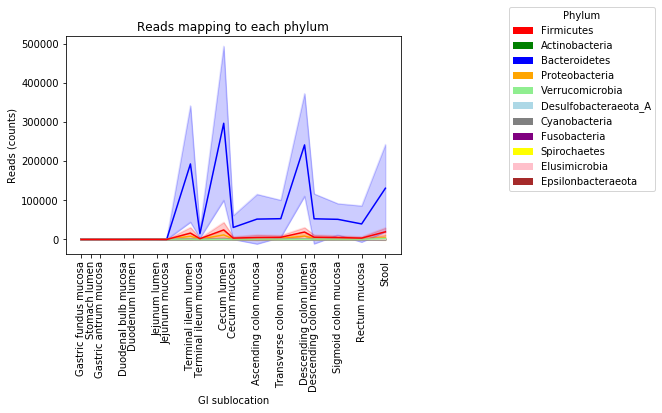

In [17]:
#samples = list(set(all_physec_readstats_df.columns) & set(estreadsbyphy_df.columns))
#phyla = list(set(all_physec_readstats_df.index) & set(estreadsbyphy_df.index))
samples = list(set(all_physec_readstats_df.columns))
phyla = list(set(all_physec_readstats_df.index))

#Add pseudovalues to denominator
#pseudo_estreadsbyphy_df = estreadsbyphy_df[estreadsbyphy_df > 1].fillna(1)
#Order samples by gi sublocation
#norm_sec_df = all_physec_readstats_df.loc[phyla, samples]/pseudo_estreadsbyphy_df.loc[phyla, samples]
norm_sec_df = all_physec_readstats_df.loc[phyla, samples]

norm_sec_ave_df = pd.DataFrame()
norm_sec_std_df = pd.DataFrame()

for phylum in norm_sec_df.index.tolist():
    #Store averages and standard deviations of each phylum
    subloc_readcount_list = []
    subloc_readcount_aves = []
    subloc_readcount_stds = []
    #Compute for each GI sublocation within the phylum
    for subloc in gi_prox2dist:
        runs = meta[meta['tissue_type'] == subloc]['Run'].unique().tolist()
        runsin = set(norm_sec_df.columns) & set(runs)
        subloc_sel = norm_sec_df[runsin].loc[phylum]
        subloc_readcount_list.append(subloc_sel)

        #Average samples from same person first and calculate standard deviation
        grouped_runs = meta[meta['Run'].isin(set(norm_sec_df.columns) & set(runs))].groupby('Participant')
        participant_average_list = []
        participant_sd_list = []
        participant_samplesn_list = []
        for name, group in grouped_runs:
            participant_average = np.average(subloc_sel[group['Run'].unique()])
            participant_average_list.append(participant_average)
            participant_sd = np.std(subloc_sel[group['Run'].unique()])
            participant_sd_list.append(participant_sd)
            participant_samplesn_list.append(group['Run'].unique().shape[0])
            
        #Average the samples for site from the same phylum
        subloc_readcount_aves.append(np.average(participant_average_list))
        #subloc_readcount_stds.append(np.sqrt(get_pooled_var(participant_samplesn_list,participant_sd_list)))
        subloc_readcount_stds.append(get_std(participant_average_list,participant_samplesn_list,participant_sd_list))
        #subloc_readcount_aves.append(np.average(subloc_sel))

        #subloc_readcount_aves.append()
        #sel[sel['tissue_type'] == subloc]['align_conc_counts'].tolist()
    y_mean = pd.Series(subloc_readcount_aves)
    x = [gi_prox2dist_coor[site] for site in gi_prox2dist]
    plt.plot(x, y_mean, label='signal mean', color=phycoldict[phylum])
    error = pd.Series(subloc_readcount_stds)
    lower = y_mean - error
    upper = y_mean + error
    plt.plot(x, lower, color=phycoldict[phylum], alpha=0.1)
    plt.plot(x, upper, color=phycoldict[phylum], alpha=0.1)
    plt.fill_between(x, lower, upper, alpha=0.2, color=phycoldict[phylum])
    
    norm_sec_std_df = norm_sec_std_df.append(pd.Series(subloc_readcount_aves,name=phylum))
    norm_sec_ave_df = norm_sec_ave_df.append(pd.Series(subloc_readcount_aves, name=phylum))

norm_sec_ave_df.columns = gi_prox2dist
norm_sec_std_df.columns = gi_prox2dist

handles = [mpatches.Patch(facecolor=phycoldict[name]) for name in phycoldict.keys()]
plt.legend(handles, phycoldict, title='Phylum',
          bbox_to_anchor=(1.5, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.xticks(ticks=x, labels=gi_prox2dist, rotation=90)
plt.ylabel('Reads (counts)')
plt.xlabel('GI sublocation')
plt.title('Reads mapping to each phylum')
plt.show()


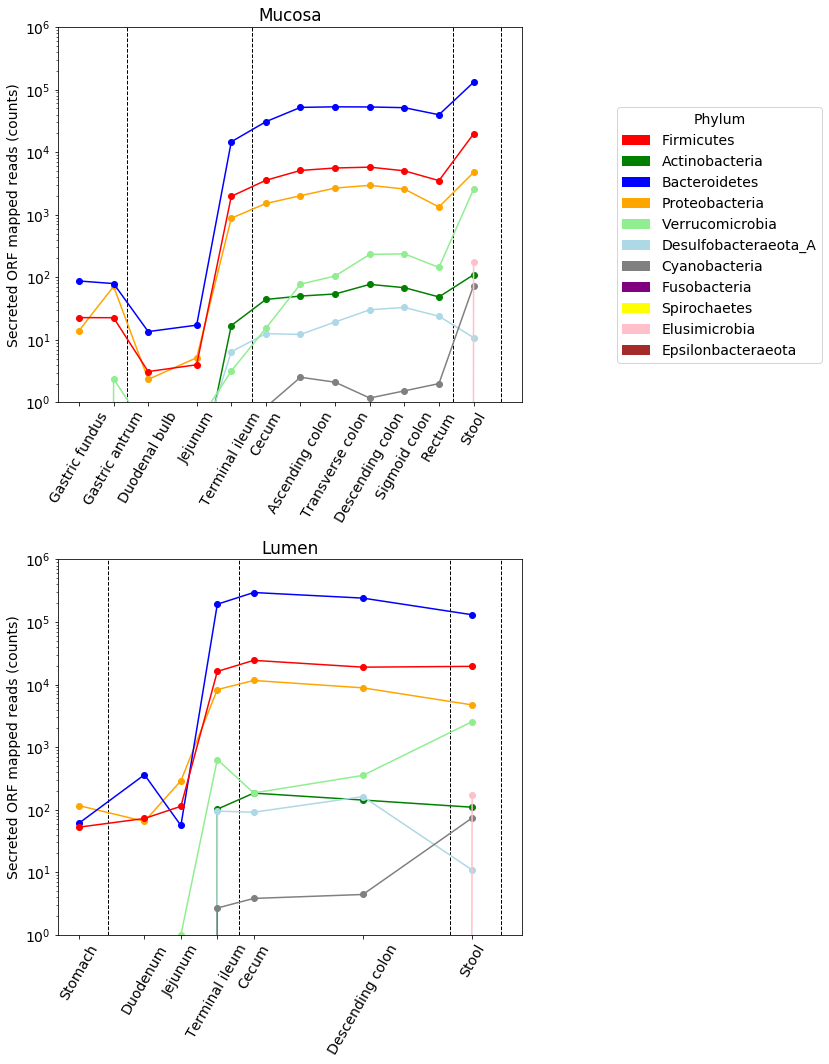

In [47]:
#Plot reads mapping to each phylum as calculated by metaphlan using latest aesthetic
#specifications
phyint = set(phycoldict.keys()) & set(norm_sec_ave_df.index)
stdev = 0.1

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=[8,15])
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=[15,8])
for site_type in [mucosal_gi_sites, lumen_gi_sites]:
    if site_type == mucosal_gi_sites:
        ax = ax0
        ax.set_title('Mucosa')
        ax.set_xticklabels(labels=[site.replace(' mucosa','') for site in site_type], rotation=60)
    else:
        ax = ax1
        ax.set_title('Lumen')
        ax.set_xticklabels(labels=[site.replace(' lumen','') for site in site_type], rotation=60)

    for phylum in phyint:
        y_mean = norm_sec_ave_df.loc[phylum, site_type]
        x = [gi_prox2dist_coor_overlay[site] for site in site_type]
        #xjitter = x + (np.random.randn(len(x)) * stdev)
        xjitter = x
        ax.plot(xjitter,
                y_mean, 'o-', label='signal mean', color=phycoldict[phylum])
        ax.set_xticks(ticks=x)
        #ax.set_xticklabels(labels=site_type, rotation=90)
        ax.set_ylabel('Secreted ORF mapped reads (counts)')
        #ax.set_xlabel('GI sublocation')
        #ax.set_title('Reads mapping to secreted ORFs of each phylum')
        
        #Add error bars
#        norm_secpropuncsq = (norm_sec_std_df.loc[[phylum]].transpose()[phylum]/norm_sec_ave_df.loc[[phylum]].fillna(0).transpose()[phylum])**2
#        secpropuncsq = (sec_std_df.loc[[phylum]].transpose()[phylum]/sec_ave_df.loc[[phylum]].fillna(0).transpose()[phylum])**2
##        gyrApropuncsq = (gyrA_std_df.loc[[phylum]].transpose()[phylum]/gyrA_ave_df.loc[[phylum]].fillna(0).transpose()[phylum])**2
#        error = (((secpropuncsq + gyrApropuncsq)**0.5)*norm_sec_ave_df.loc[[phylum]].fillna(0).transpose()[phylum]).fillna(0)
#        error = error.loc[site_type]
        #error = norm_sec_std_df.loc[phylum, site_type]
        error = norm_sec_std_df.loc[phylum, site_type]
        lowererr = [0]*len(error)
        uppererr = error
        asymmetric_error = [lowererr, uppererr]
        #ax.errorbar(xjitter, list(y_mean), yerr=asymmetric_error, fmt='o', ecolor=phycoldict[phylum], color=phycoldict[phylum], capsize=4)
    fig.tight_layout()
    #ax.axvspan(0,4,facecolor='yellow', alpha=0.5) #Stomach
    #ax.axvspan(4,13,facecolor='green', alpha=0.5) #Small intestine
    #ax.axvspan(13,27.5,facecolor='blue', alpha=0.5) #Large intestine
    #ax.axvspan(27.5,31,facecolor='gray', alpha=0.5) #Stool
    vlinexlist = [4, 13, 27.5, 31]
    ax.vlines(vlinexlist, 1, 1000000, linestyles='dashed',linewidth=1.0)
    ax.set_yscale('log')
    ax.set_ylim([1,1000000])
    
plt.legend(handles, phycoldict, title='Phylum',
          bbox_to_anchor=(1.5, 0.9), bbox_transform=plt.gcf().transFigure, loc='upper right')

plt.rcParams.update({'font.size': 14})
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('ipynb_out/Figures_eps/Fig4_v7_secreadscounts_perphybygi_scatternoerrline.svg',format='svg', bbox_inches="tight")
plt.savefig('ipynb_out/Figures_eps/Fig4_v7_secreadscounts_perphybygi_scatternoerrline.png',format='png', bbox_inches="tight")

In [65]:
np.log10(norm_sec_ave_df.loc['Fusobacteria'])

/home/ec2-user/bin/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Gastric fundus mucosa          -inf
Stomach lumen                  -inf
Gastric antrum mucosa          -inf
Duodenal bulb mucosa           -inf
Duodenum lumen                 -inf
Jejunum lumen                  -inf
Jejunum mucosa                 -inf
Terminal ileum lumen      -1.278754
Terminal ileum mucosa          -inf
Cecum lumen               -0.189056
Cecum mucosa              -1.278754
Ascending colon mucosa    -1.278754
Transverse colon mucosa   -0.977724
Descending colon lumen    -0.977724
Descending colon mucosa   -1.230449
Sigmoid colon mucosa      -1.230449
Rectum mucosa                  -inf
Stool                     -0.096910
Name: Fusobacteria, dtype: float64

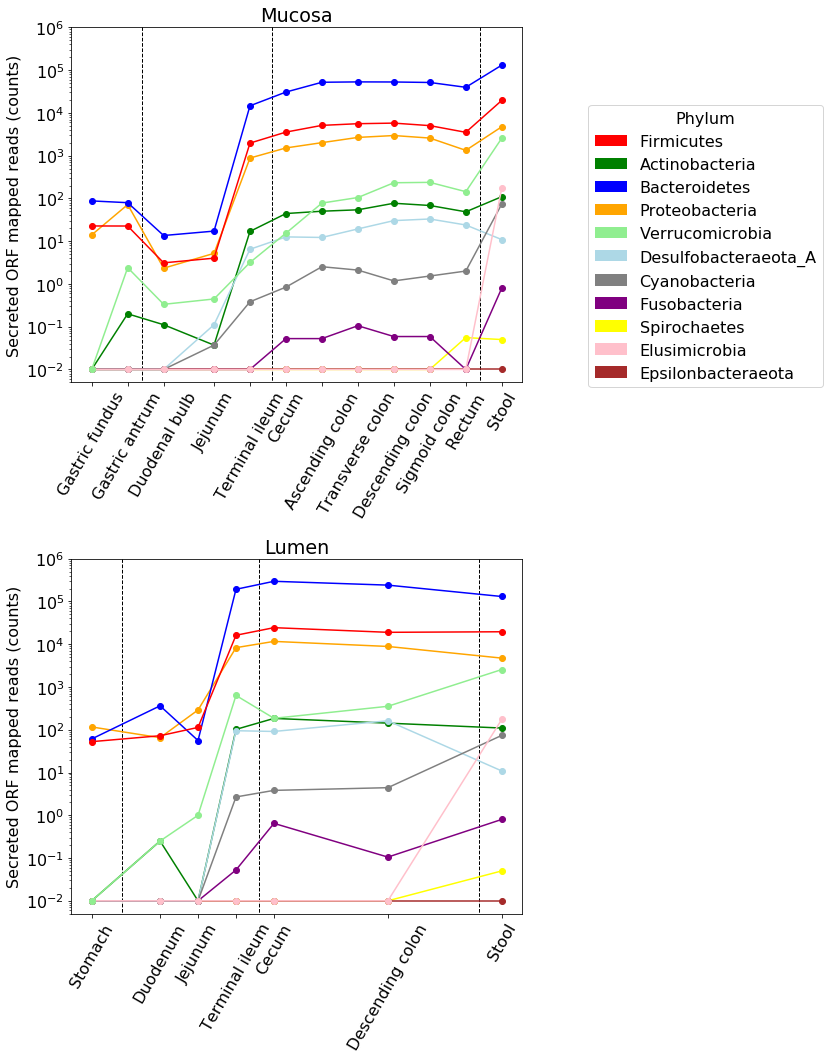

In [80]:
# pseudoval_sec_ave_df = norm_sec_ave_df.replace(0,0.01)

#Plot reads mapping to each phylum as calculated by metaphlan using latest aesthetic
#specifications
phyint = set(phycoldict.keys()) & set(pseudoval_sec_ave_df.index)
stdev = 0.1

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=[8,15])
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=[15,8])
for site_type in [mucosal_gi_sites, lumen_gi_sites]:
    if site_type == mucosal_gi_sites:
        ax = ax0
        ax.set_title('Mucosa')
        ax.set_xticklabels(labels=[site.replace(' mucosa','') for site in site_type], rotation=60)
    else:
        ax = ax1
        ax.set_title('Lumen')
        ax.set_xticklabels(labels=[site.replace(' lumen','') for site in site_type], rotation=60)

    for phylum in phyint:
        y_mean = pseudoval_sec_ave_df.loc[phylum, site_type]
        x = [gi_prox2dist_coor_overlay[site] for site in site_type]
        #xjitter = x + (np.random.randn(len(x)) * stdev)
        xjitter = x
        ax.plot(xjitter,
                y_mean, 'o-', label='signal mean', color=phycoldict[phylum])
        ax.set_xticks(ticks=x)
        #ax.set_xticklabels(labels=site_type, rotation=90)
        ax.set_ylabel('Secreted ORF mapped reads (counts)')
        #ax.set_xlabel('GI sublocation')
        #ax.set_title('Reads mapping to secreted ORFs of each phylum')
        
        #Add error bars
#        norm_secpropuncsq = (norm_sec_std_df.loc[[phylum]].transpose()[phylum]/norm_sec_ave_df.loc[[phylum]].fillna(0).transpose()[phylum])**2
#        secpropuncsq = (sec_std_df.loc[[phylum]].transpose()[phylum]/sec_ave_df.loc[[phylum]].fillna(0).transpose()[phylum])**2
##        gyrApropuncsq = (gyrA_std_df.loc[[phylum]].transpose()[phylum]/gyrA_ave_df.loc[[phylum]].fillna(0).transpose()[phylum])**2
#        error = (((secpropuncsq + gyrApropuncsq)**0.5)*norm_sec_ave_df.loc[[phylum]].fillna(0).transpose()[phylum]).fillna(0)
#        error = error.loc[site_type]
        #error = norm_sec_std_df.loc[phylum, site_type]
        error = norm_sec_std_df.loc[phylum, site_type]
        lowererr = [0]*len(error)
        uppererr = error
        asymmetric_error = [lowererr, uppererr]
        #ax.errorbar(xjitter, list(y_mean), yerr=asymmetric_error, fmt='o', ecolor=phycoldict[phylum], color=phycoldict[phylum], capsize=4)
    fig.tight_layout()
    #ax.axvspan(0,4,facecolor='yellow', alpha=0.5) #Stomach
    #ax.axvspan(4,13,facecolor='green', alpha=0.5) #Small intestine
    #ax.axvspan(13,27.5,facecolor='blue', alpha=0.5) #Large intestine
    #ax.axvspan(27.5,31,facecolor='gray', alpha=0.5) #Stool
    vlinexlist = [4, 13, 27.5]#, 31]
    ax.vlines(vlinexlist, 0.001, 1000000, linestyles='dashed',linewidth=1.0)
    ax.set_yscale('log')
    ax.set_ylim([0.005,1000000])
    
plt.legend(handles, phycoldict, title='Phylum',
          bbox_to_anchor=(1.5, 0.9), bbox_transform=plt.gcf().transFigure, loc='upper right')

plt.rcParams.update({'font.size': 16})
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('ipynb_out/Figures_eps/Fig4_v7_secreadscounts_perphybygi_scatternoerrline_pseudoval.svg',format='svg', bbox_inches="tight")
plt.savefig('ipynb_out/Figures_eps/Fig4_v7_secreadscounts_perphybygi_scatternoerrline_pseudoval.png',format='png', bbox_inches="tight")